# EXPLORATORY DATA ANALYSIS OF HEART ATTACK IN RUSSIA YOUTH AND ADULTS.

### Goal of the Analysis.
- To identify the risk factors for heart attack.
- To identify the correlation between lifestyle and heart diseases, etc

### Steps for EDA in this notebook.
1. Understand the Dataset: Shape & Overview.
2. Check for Missing Values & Data Types: Identify nulls, Visualize missing values,
   split the dataset into 2 (dataset with no alcohol report and    dataset with alcohol report).
3. Data Cleaning:
    - Convert categorical variables to proper types.
    - Fix inconsistencies if any (e.g., "Male", "male", "M").
4. Univariate analysis.
    - Numerical Features
    - Categorical Features
5. Bivariate analysis
    - Numerical vs Numerical
    - Numerical vs Categorical
    - Categorical vs Categorical
6. Multivariate Analysis
7. Target variable Analysis
8. Summary and Insights

In [1]:
# import packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data.
df = pd.read_csv("heart_attack_russia_youth_vs_adult.csv")

# read the shape of data.
df.shape

(50000, 30)

In [3]:
# overview of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [4]:
# read the head part of the data.
df.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


In [5]:
# read the columns.
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [6]:
# Read number of entries.
df.index

RangeIndex(start=0, stop=50000, step=1)

In [7]:
# Check for the missing values.
df.isna().sum()

ID                           0
Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

<Axes: >

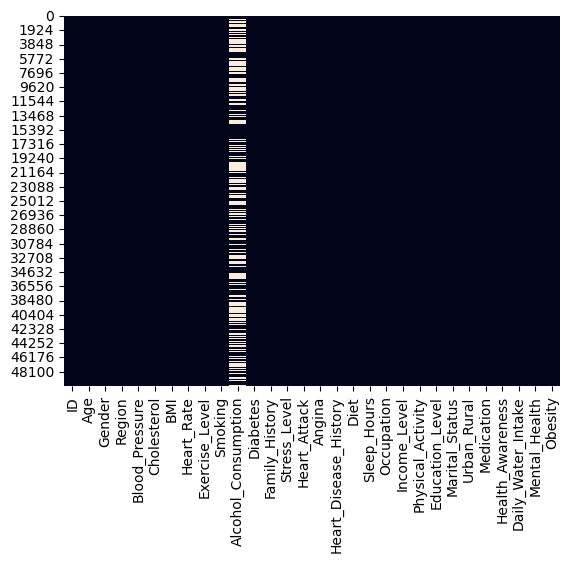

In [8]:
# Visualize missing values.
sns.heatmap(df.isnull(), cbar=False)

In [9]:
# Calculate the percentage of individuals with no report of alcohol consumption.
(df["Alcohol_Consumption"].isna().sum()/len(df))*100

np.float64(50.048)

In [10]:
# check for duplicate entries for all columns.
df.duplicated().sum()

np.int64(0)

In [11]:
# check for duplicate entries for ID column only.
df.duplicated(subset="ID").sum()

np.int64(0)

In [12]:
# Run descriptive analysis for the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.50,37500.25,50000.0
Age,50000.0,35.991820,14.110139,12.0,24.00,36.00,48.00,60.0
Blood_Pressure,50000.0,120.058636,14.975835,60.0,109.90,120.05,130.20,188.4
Cholesterol,50000.0,199.852762,49.998331,-18.7,166.10,199.90,233.50,398.8
BMI,50000.0,24.983912,5.003784,2.9,21.60,25.00,28.40,46.1
Heart_Rate,50000.0,79.988980,11.804567,60.0,70.00,80.00,90.00,100.0
Stress_Level,50000.0,5.503700,2.870741,1.0,3.00,6.00,8.00,10.0
Sleep_Hours,50000.0,7.011464,1.740651,4.0,5.50,7.00,8.50,10.0
Health_Awareness,50000.0,3.007100,1.410351,1.0,2.00,3.00,4.00,5.0
Daily_Water_Intake,50000.0,2.997782,1.149608,1.0,2.00,3.00,4.00,5.0


In [13]:
# Filter individuals with no report of alcohol.

no_alcohol_report = df["Alcohol_Consumption"].isna()

df_alcohol_unknown = df[no_alcohol_report]
df_alcohol_unknown.head().T

,1,4,5,7,9
ID,2,5,6,8,10
Age,40,19,32,30,22
Gender,Female,Female,Female,Female,Male
Region,Urban,Urban,Rural,Rural,Rural
Blood_Pressure,138.8,108.0,104.3,100.3,138.3
Cholesterol,157.5,224.5,257.4,268.0,196.7
BMI,27.1,27.5,17.6,14.5,17.5
Heart_Rate,82,67,60,68,88
Exercise_Level,Moderate,Low,Low,Moderate,Low
Smoking,False,False,True,False,False


In [14]:
# export the dataset of individuals with no alcohol report in csv format
df_alcohol_unknown.to_csv("heart_attack_no_alcohol_report.csv", index=False)

In [19]:
# Filter individuals with report of alcohol.
# METHOD 1.

df_alcohol_known = df.dropna(subset="Alcohol_Consumption")
df_alcohol_known.head().T

,0,2,3,6,8
ID,1,3,4,7,9
Age,50,26,54,50,34
Gender,Male,Male,Female,Male,Male
Region,Rural,Rural,Rural,Suburban,Urban
Blood_Pressure,110.0,116.0,133.5,116.8,131.8
Cholesterol,196.5,210.1,170.5,206.9,244.6
BMI,15.9,27.2,26.0,27.9,24.4
Heart_Rate,76,71,74,75,65
Exercise_Level,High,Moderate,Moderate,High,Low
Smoking,False,False,True,True,False


In [18]:
# Filter individuals with report of alcohol.
# METHOD 2.

no_alcohol_report = df["Alcohol_Consumption"].isna()

df_alcohol_known_2 = df[~no_alcohol_report]
df_alcohol_known_2.head().T

,0,2,3,6,8
ID,1,3,4,7,9
Age,50,26,54,50,34
Gender,Male,Male,Female,Male,Male
Region,Rural,Rural,Rural,Suburban,Urban
Blood_Pressure,110.0,116.0,133.5,116.8,131.8
Cholesterol,196.5,210.1,170.5,206.9,244.6
BMI,15.9,27.2,26.0,27.9,24.4
Heart_Rate,76,71,74,75,65
Exercise_Level,High,Moderate,Moderate,High,Low
Smoking,False,False,True,True,False


In [20]:
# Export the dataset of individuals with alcohol report in csv format.
df_alcohol_known.to_csv("heart_attack_with_alcohol_report.csv", index=False)

In [18]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,50,40,26,54,19,32,50,30,34,22,22,35,47,51,35,14,33,13,35,55
Gender,Male,Female,Male,Female,Female,Female,Male,Female,Male,Male,Female,Female,Male,Male,Male,Female,Female,Female,Female,Female
Region,Rural,Urban,Rural,Rural,Urban,Rural,Suburban,Rural,Urban,Rural,Rural,Rural,Rural,Rural,Rural,Suburban,Rural,Urban,Urban,Urban
Blood_Pressure,110.0,138.8,116.0,133.5,108.0,104.3,116.8,100.3,131.8,138.3,128.8,141.0,130.4,113.8,121.7,121.9,137.8,121.3,103.7,100.0
Cholesterol,196.5,157.5,210.1,170.5,224.5,257.4,206.9,268.0,244.6,196.7,233.1,141.9,229.5,231.2,274.6,242.1,184.7,180.8,209.7,134.7
BMI,15.9,27.1,27.2,26.0,27.5,17.6,27.9,14.5,24.4,17.5,19.6,24.0,20.9,28.4,31.5,18.2,18.7,22.5,26.8,30.0
Heart_Rate,76,82,71,74,67,60,75,68,65,88,90,73,99,75,97,73,64,69,91,92
Exercise_Level,High,Moderate,Moderate,Moderate,Low,Low,High,Moderate,Low,Low,Moderate,Moderate,Moderate,Low,Moderate,Moderate,Low,Low,Moderate,Moderate
Smoking,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False


### 3. Convert categorical variables (norminal and ordinal) to proper types.

In [19]:
# Check the dtype of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [20]:
# Get a list of categorical variables.

Nominal_variables = ["Gender", "Region", "Diet", "Occupation", "Marital_Status", "Urban_Rural"]
Ordinal_variables = ["Exercise_Level", "Alcohol_Consumption", "Income_Level", "Physical_Activity", "Education_Level"]

In [21]:
# Convert the norminal variables with object dtype to categorical dtype.
# - to reduce memory usage
# - for meaningful data analysis and visualization.

for var in Nominal_variables:
    df[var] = df[var].astype('category')

In [22]:
# Confirm if the norminal variables with object dtype (["Gender", "Region", "Diet", "Occupation", "Marital_Status", "Urban_Rural"])
# were converted to categorical dtype.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     50000 non-null  int64   
 1   Age                    50000 non-null  int64   
 2   Gender                 50000 non-null  category
 3   Region                 50000 non-null  category
 4   Blood_Pressure         50000 non-null  float64 
 5   Cholesterol            50000 non-null  float64 
 6   BMI                    50000 non-null  float64 
 7   Heart_Rate             50000 non-null  int64   
 8   Exercise_Level         50000 non-null  object  
 9   Smoking                50000 non-null  bool    
 10  Alcohol_Consumption    24976 non-null  object  
 11  Diabetes               50000 non-null  bool    
 12  Family_History         50000 non-null  bool    
 13  Stress_Level           50000 non-null  int64   
 14  Heart_Attack           50000 non-null 

In [23]:
Ordinal_variables = ["Exercise_Level", "Alcohol_Consumption", "Income_Level", "Physical_Activity", "Education_Level"]

In [24]:
# Check the category labels used for each variable.

for var in Ordinal_variables:
    print(df[var].value_counts())

Exercise_Level
Moderate    24946
Low         15100
High         9954
Name: count, dtype: int64
Alcohol_Consumption
Moderate    20022
Heavy        4954
Name: count, dtype: int64
Income_Level
Middle    20025
Low       19863
High      10112
Name: count, dtype: int64
Physical_Activity
Moderate    24828
Low         15158
High        10014
Name: count, dtype: int64
Education_Level
Secondary    20064
Primary      14983
Higher       14953
Name: count, dtype: int64


In [25]:
# Assign the above levels to each variable.

Exercise_Levels = ['Low', 'Moderate', 'High'] 
Alcohol_Consumption_levels = ['NaN','Moderate', 'Heavy']
Income_Levels = ['Low', 'Middle', 'High']
Physical_Activity_levels = ['Low', 'Moderate', 'High']
Education_Levels = ['Primary', 'Secondary', 'Higher']

In [26]:
# Set the orders for the ordinal variables with object dtype
# - to reduce memory usage
# - for meaningful data analysis and visualization.

# Import the class.
from pandas.api.types import CategoricalDtype

# Set an instance for the class to specify orders.
Ordinal_variables_orders = [Exercise_Levels, Alcohol_Consumption_levels, Income_Levels, Physical_Activity_levels, Education_Levels]

Exercise_Levels_order = CategoricalDtype(categories=Exercise_Levels, ordered=True)
Alcohol_Consumption_levels_order = CategoricalDtype(categories=Alcohol_Consumption_levels, ordered=True)
Income_Levels_order = CategoricalDtype(categories=Income_Levels, ordered=True)
Physical_Activity_levels_order = CategoricalDtype(categories=Physical_Activity_levels, ordered=True)
Education_Levels_order = CategoricalDtype(categories=Education_Levels, ordered=True)

In [27]:
# Set the orders for the ordinal variables columns with object dtype

df["Exercise_Level"] = df["Exercise_Level"].astype(Exercise_Levels_order)
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].astype(Alcohol_Consumption_levels_order)
df["Income_Level"] = df["Income_Level"].astype(Income_Levels_order)
df["Physical_Activity"] = df["Physical_Activity"].astype(Physical_Activity_levels_order)
df["Education_Level"] = df["Education_Level"].astype(Education_Levels_order)

In [28]:
# Confirm if the ordinal variables with object dtype (["Exercise_Level", "Alcohol_Consumption", 
# "Income_Level", "Physical_Activity", "Education_Level"]) were converted to ordinal dtype.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     50000 non-null  int64   
 1   Age                    50000 non-null  int64   
 2   Gender                 50000 non-null  category
 3   Region                 50000 non-null  category
 4   Blood_Pressure         50000 non-null  float64 
 5   Cholesterol            50000 non-null  float64 
 6   BMI                    50000 non-null  float64 
 7   Heart_Rate             50000 non-null  int64   
 8   Exercise_Level         50000 non-null  category
 9   Smoking                50000 non-null  bool    
 10  Alcohol_Consumption    24976 non-null  category
 11  Diabetes               50000 non-null  bool    
 12  Family_History         50000 non-null  bool    
 13  Stress_Level           50000 non-null  int64   
 14  Heart_Attack           50000 non-null 

In [29]:
list(df.columns)

['ID',
 'Age',
 'Gender',
 'Region',
 'Blood_Pressure',
 'Cholesterol',
 'BMI',
 'Heart_Rate',
 'Exercise_Level',
 'Smoking',
 'Alcohol_Consumption',
 'Diabetes',
 'Family_History',
 'Stress_Level',
 'Heart_Attack',
 'Angina',
 'Heart_Disease_History',
 'Diet',
 'Sleep_Hours',
 'Occupation',
 'Income_Level',
 'Physical_Activity',
 'Education_Level',
 'Marital_Status',
 'Urban_Rural',
 'Medication',
 'Health_Awareness',
 'Daily_Water_Intake',
 'Mental_Health',
 'Obesity']

In [30]:
# Check for inconsistencies in the variables (e.g., "Male", "male", "M")

for var in list(df.columns):
    print(df[var].value_counts())

ID
49984    1
49983    1
49982    1
49981    1
49980    1
        ..
5        1
4        1
3        1
2        1
1        1
Name: count, Length: 50000, dtype: int64
Age
28    1109
59    1105
24    1099
34    1089
26    1083
37    1073
39    1065
58    1063
49    1050
40    1049
55    1046
29    1042
50    1037
41    1031
15    1031
27    1030
47    1026
53    1026
32    1024
16    1024
21    1024
20    1021
35    1019
30    1018
56    1016
13    1015
36    1014
33    1013
48    1011
19    1009
25    1009
52    1008
14    1007
43    1005
51    1002
18     997
38     995
17     991
22     991
60     988
23     987
46     985
31     983
44     982
12     975
42     975
57     969
45     954
54     935
Name: count, dtype: int64
Gender
Female    24155
Male      23944
Other      1901
Name: count, dtype: int64
Region
Urban       25034
Rural       14946
Suburban    10020
Name: count, dtype: int64
Blood_Pressure
122.1    165
115.3    157
125.8    156
119.7    155
119.3    153
        ... 
165.2

In [31]:
# Inconsistencies found in the variables.
Gender = ['Female', 'Male', 'Other']
Urban_Rural = ['Urban', 'Rural']

In [32]:
# Redistribute the 'other' entries in gender column with 'male' and 'female' in original male-to-female ratio.

# Get the original male-to-female ratio.
Male = 23944
Female = 24155
Other = 1901

Total = Male + Female
Male_ratio = Male / Total
Female_ratio = Female / Total

# To round up to 3 decimal places
# Male_ratio = np.ceil((Male / Total) * 1000) / 1000
# Female_ratio = np.ceil((Female / Total) * 1000) / 1000

print('Male_ratio: ', Male_ratio, '\n', 'Female_ratio: ', Female_ratio)

Male_ratio:  0.49780660720597103 
 Female_ratio:  0.502193392794029


In [33]:
# Randomly assign based on calculated probabilities.

mask_other = df['Gender'] == 'Other'

df.loc[mask_other, 'Gender'] = np.random.choice(['Male', 'Female'], size=mask_other.sum(),p=[Male_ratio, Female_ratio])

In [34]:
# Check if there is no 'Other' entry in the column Gender.
# Method 1

df['Gender'].value_counts()

Gender
Female    25096
Male      24904
Other         0
Name: count, dtype: int64

In [35]:
# Check if there is no 'Other' entry in the column Gender.
# Method 2

df['Gender'].value_counts().get('Other', 0) == 0

np.True_

In [36]:
# Remove the column 'Urban_Rural' from the df.

df = df.drop('Urban_Rural', axis=1)

### UNIVARIATE ANALYSIS.

#### Numerical Features.

<Axes: ylabel='count'>

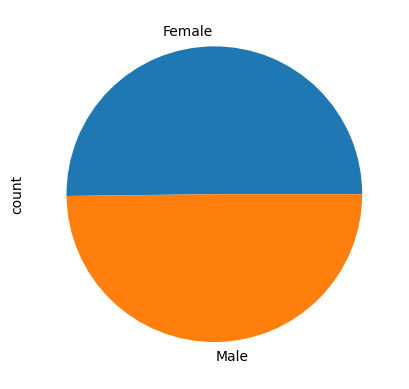

In [37]:
# Visualize the proportion of male and female categories.

df['Gender'].value_counts().plot(kind='pie')

In [39]:
# Get a list of numerical variables without the ID column.

Numerical_variables = df.select_dtypes(include=['number']).columns.tolist()[1:]
Numerical_variables

['Age',
 'Blood_Pressure',
 'Cholesterol',
 'BMI',
 'Heart_Rate',
 'Stress_Level',
 'Sleep_Hours',
 'Health_Awareness',
 'Daily_Water_Intake',
 'Mental_Health']

In [40]:
# Health_Awareness_Scale = check the image on your phone.

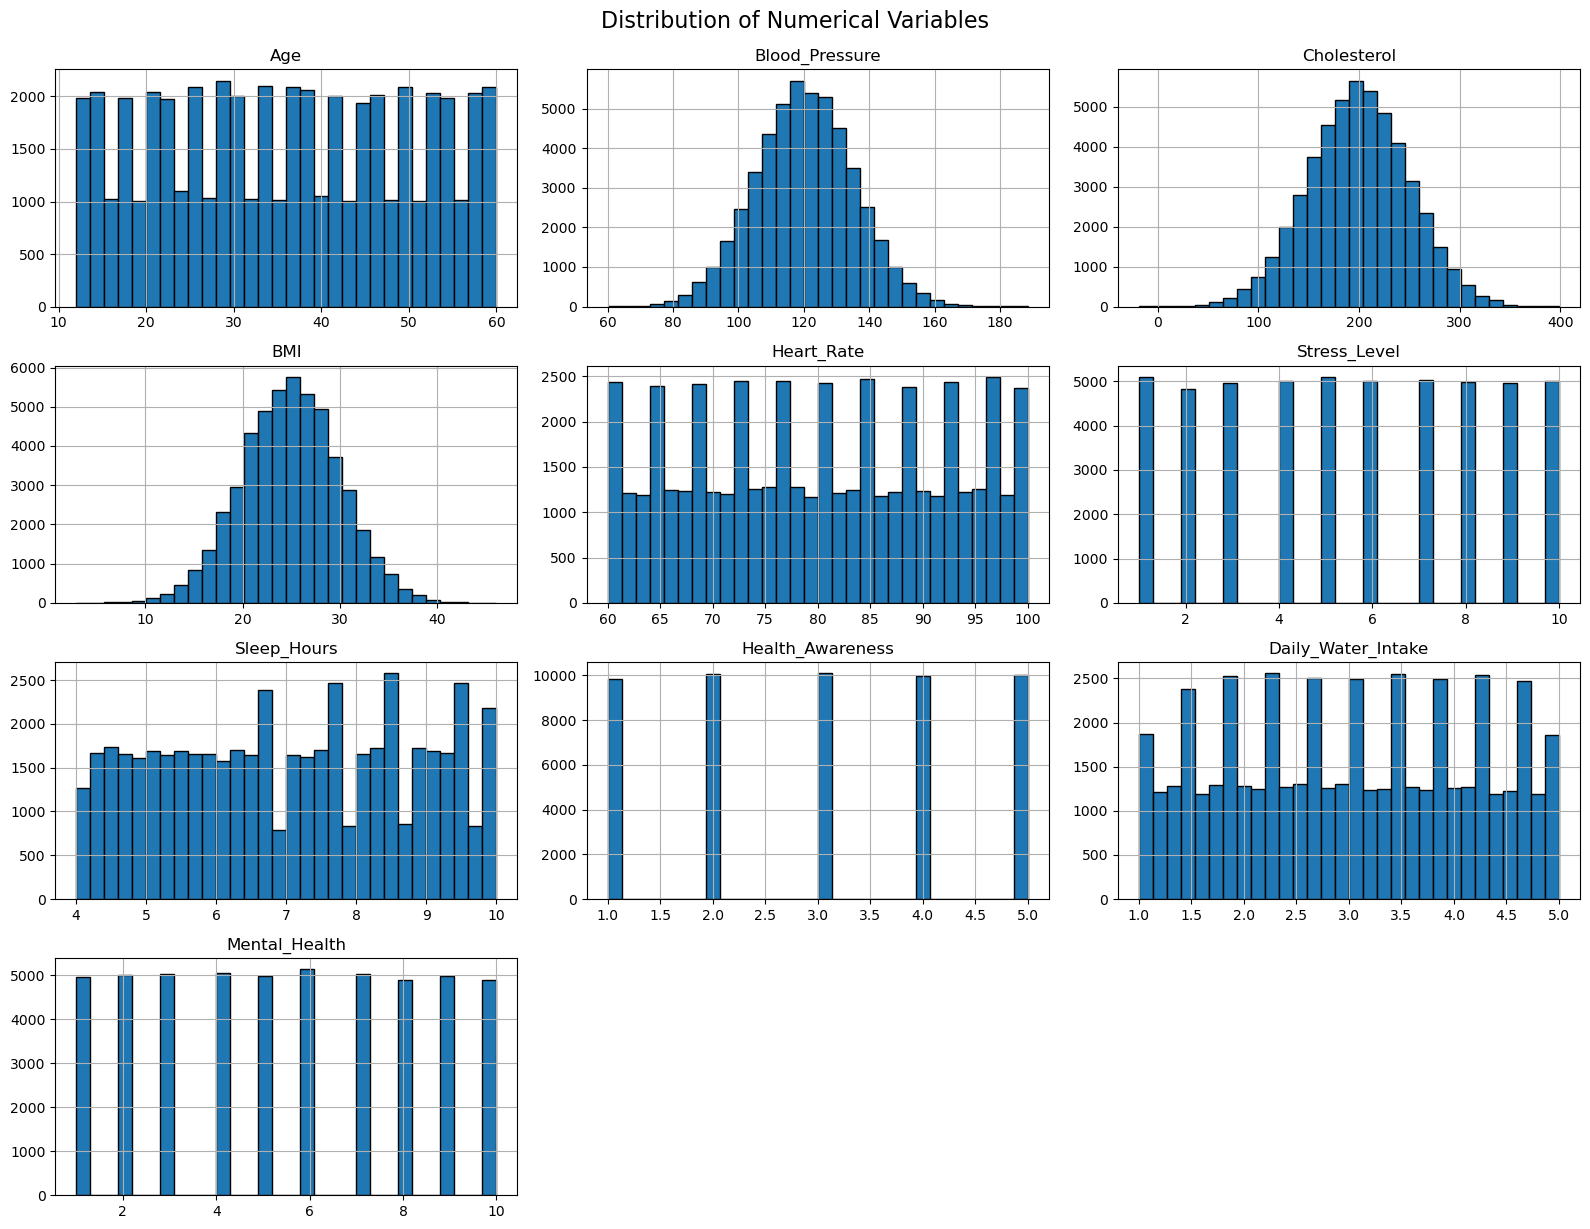

In [43]:
# Distribution of all numerical variables using histogrm.
Numerical_variables

#Set the figure size.
df[Numerical_variables].hist(figsize=(16,12), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)
plt.show()

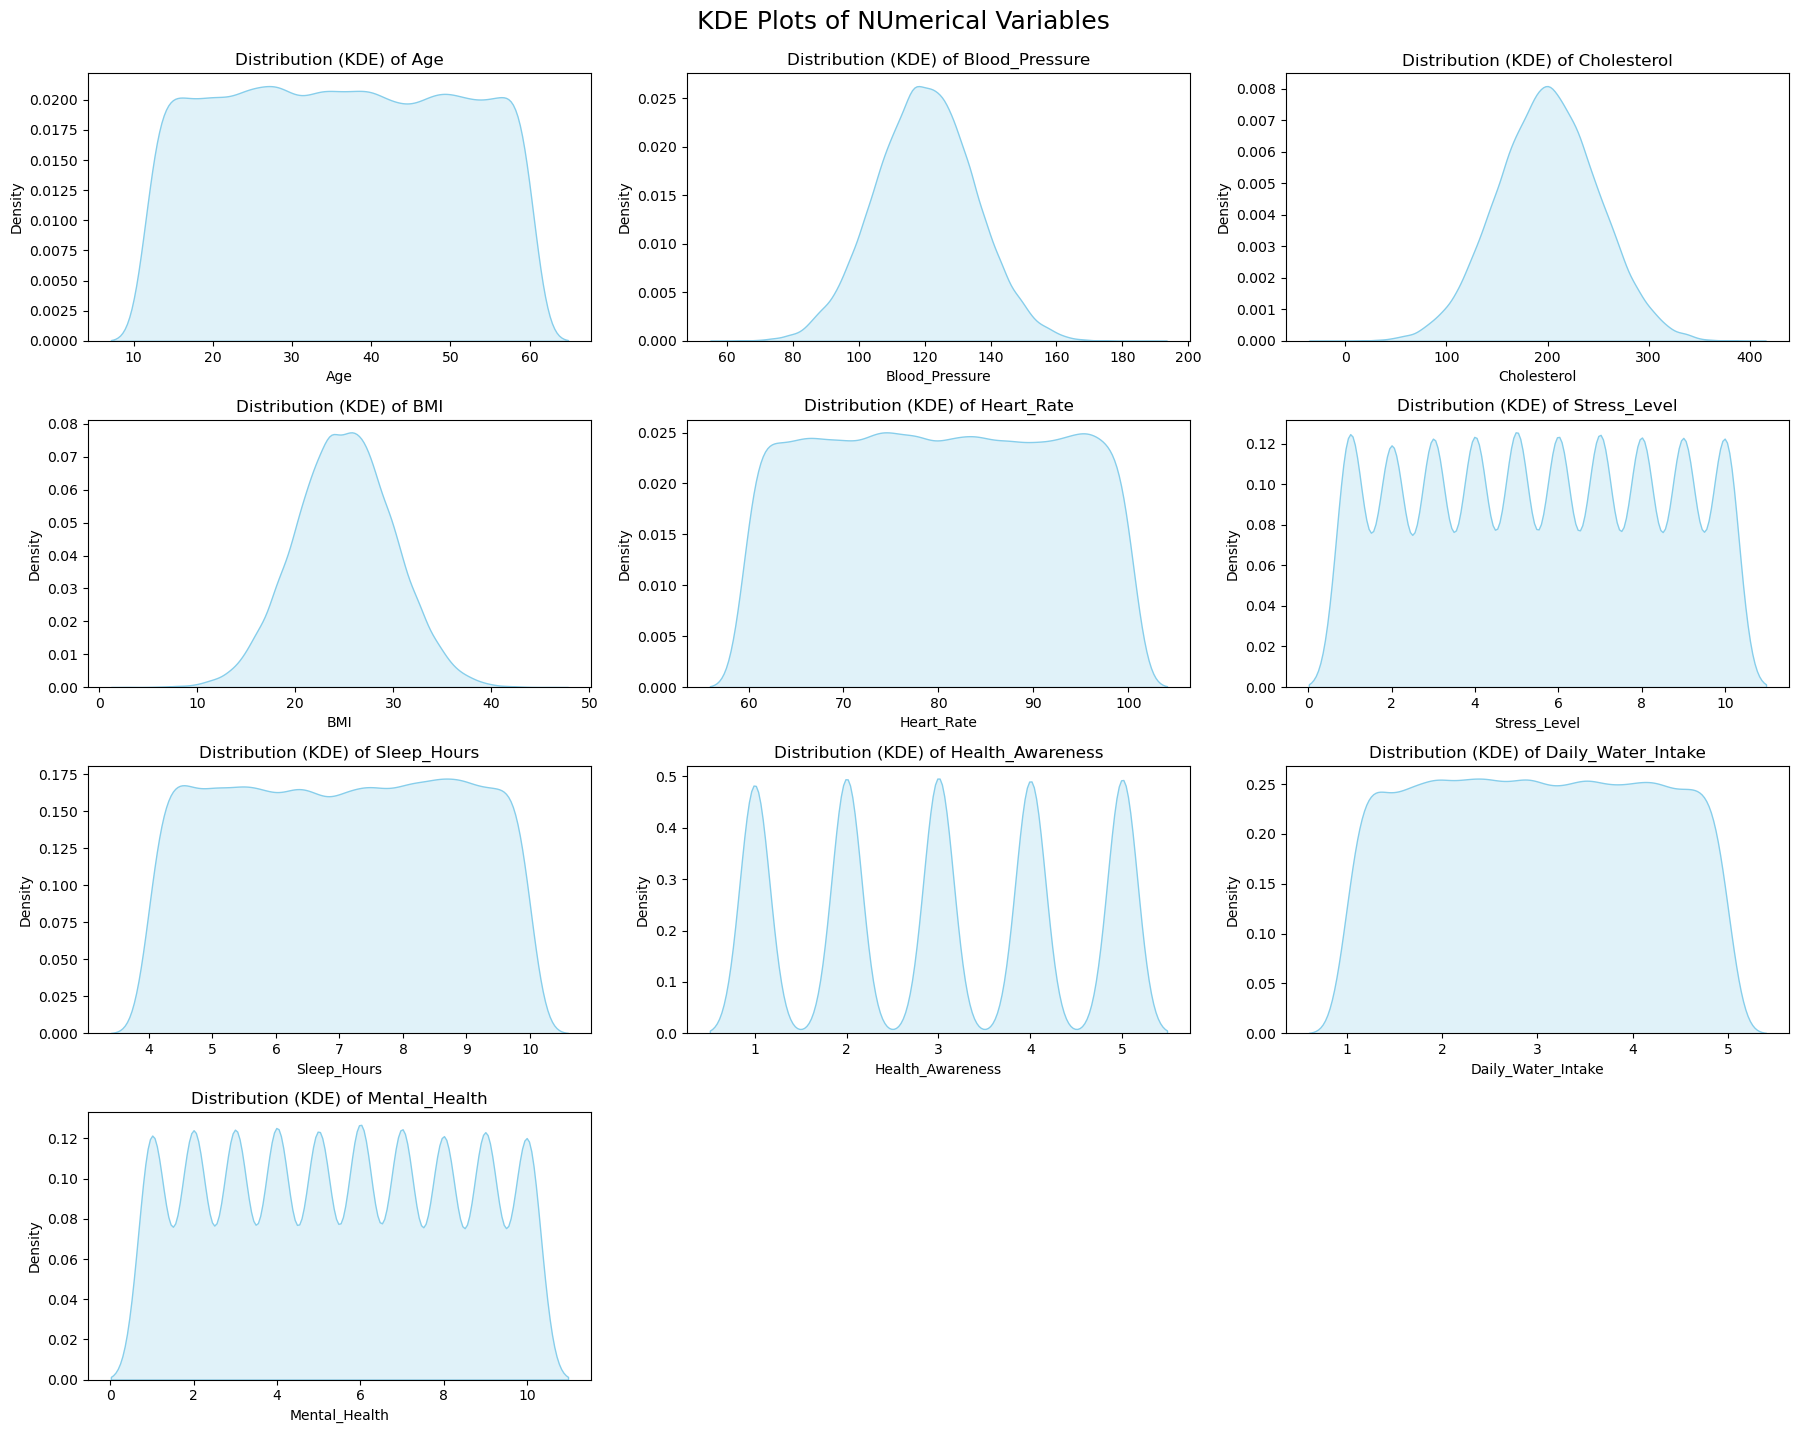

In [58]:
#Plot KDE for each numerical variable
#Numerical_variables

#Set up the plot grid.
plt.figure(figsize=(18,14))

#Plot KDE for each numerical variable

for i, var in enumerate(Numerical_variables, 1):
    plt.subplot((len(Numerical_variables)+2)//3, 3, i)
    sns.kdeplot(data=df, x=var, fill=True, color='skyblue')
    plt.title(f'Distribution (KDE) of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle('KDE Plots of NUmerical Variables', fontsize=18, y=1.02)
plt.show()

In [59]:
Numerical_variables

['Age',
 'Blood_Pressure',
 'Cholesterol',
 'BMI',
 'Heart_Rate',
 'Stress_Level',
 'Sleep_Hours',
 'Health_Awareness',
 'Daily_Water_Intake',
 'Mental_Health']

In [63]:
import os

#Create a directory to save the plots
output_dir = 'kde plots'
os.makedirs(output_dir, exist_ok=True)

#Generate and save each kde plot

for var in Numerical_variables:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=df, x=var, fill=True, color='skyblue')
    plt.title(f'Distribution (KDE) of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.tight_layout()

    #save the figure.
    file_path = os.path.join(output_dir, f'{var}_kde.png')
    plt.savefig(file_path)
    plt.close() #Close the figure to save memory.

print('completed')

completed


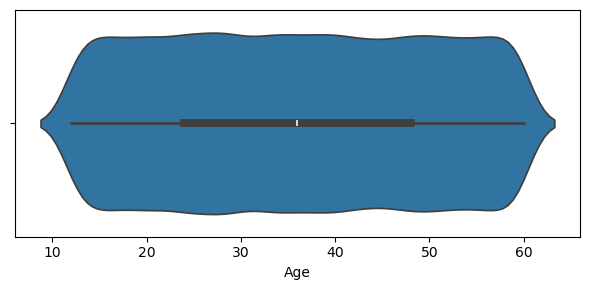

In [44]:
fig = plt.figure(figsize=(6,3))
sns.violinplot(x=df['Age'])
plt.tight_layout()
fig.savefig('Age.jpg')

#### Categorical Variables.

In [64]:
# Get a list of categorical variables.

Cat_variables = df.select_dtypes(exclude=['number']).columns.tolist()
Cat_variables

['Gender',
 'Region',
 'Exercise_Level',
 'Smoking',
 'Alcohol_Consumption',
 'Diabetes',
 'Family_History',
 'Heart_Attack',
 'Angina',
 'Heart_Disease_History',
 'Diet',
 'Occupation',
 'Income_Level',
 'Physical_Activity',
 'Education_Level',
 'Marital_Status',
 'Medication',
 'Obesity']

In [ ]:
# Get a list of categorical variables.

Nominal_features = ["Gender", "Region","Smoking", "Diabetes", "Family_History", "Heart_Attack", "Angina", "Heart_Disease_History", 
                    "Diet", "Occupation", "Marital_Status", "Medication", "Obesity"]
Ordinal_features = ["Exercise_Level", "Alcohol_Consumption", "Income_Level", "Physical_Activity", "Education_Level"]

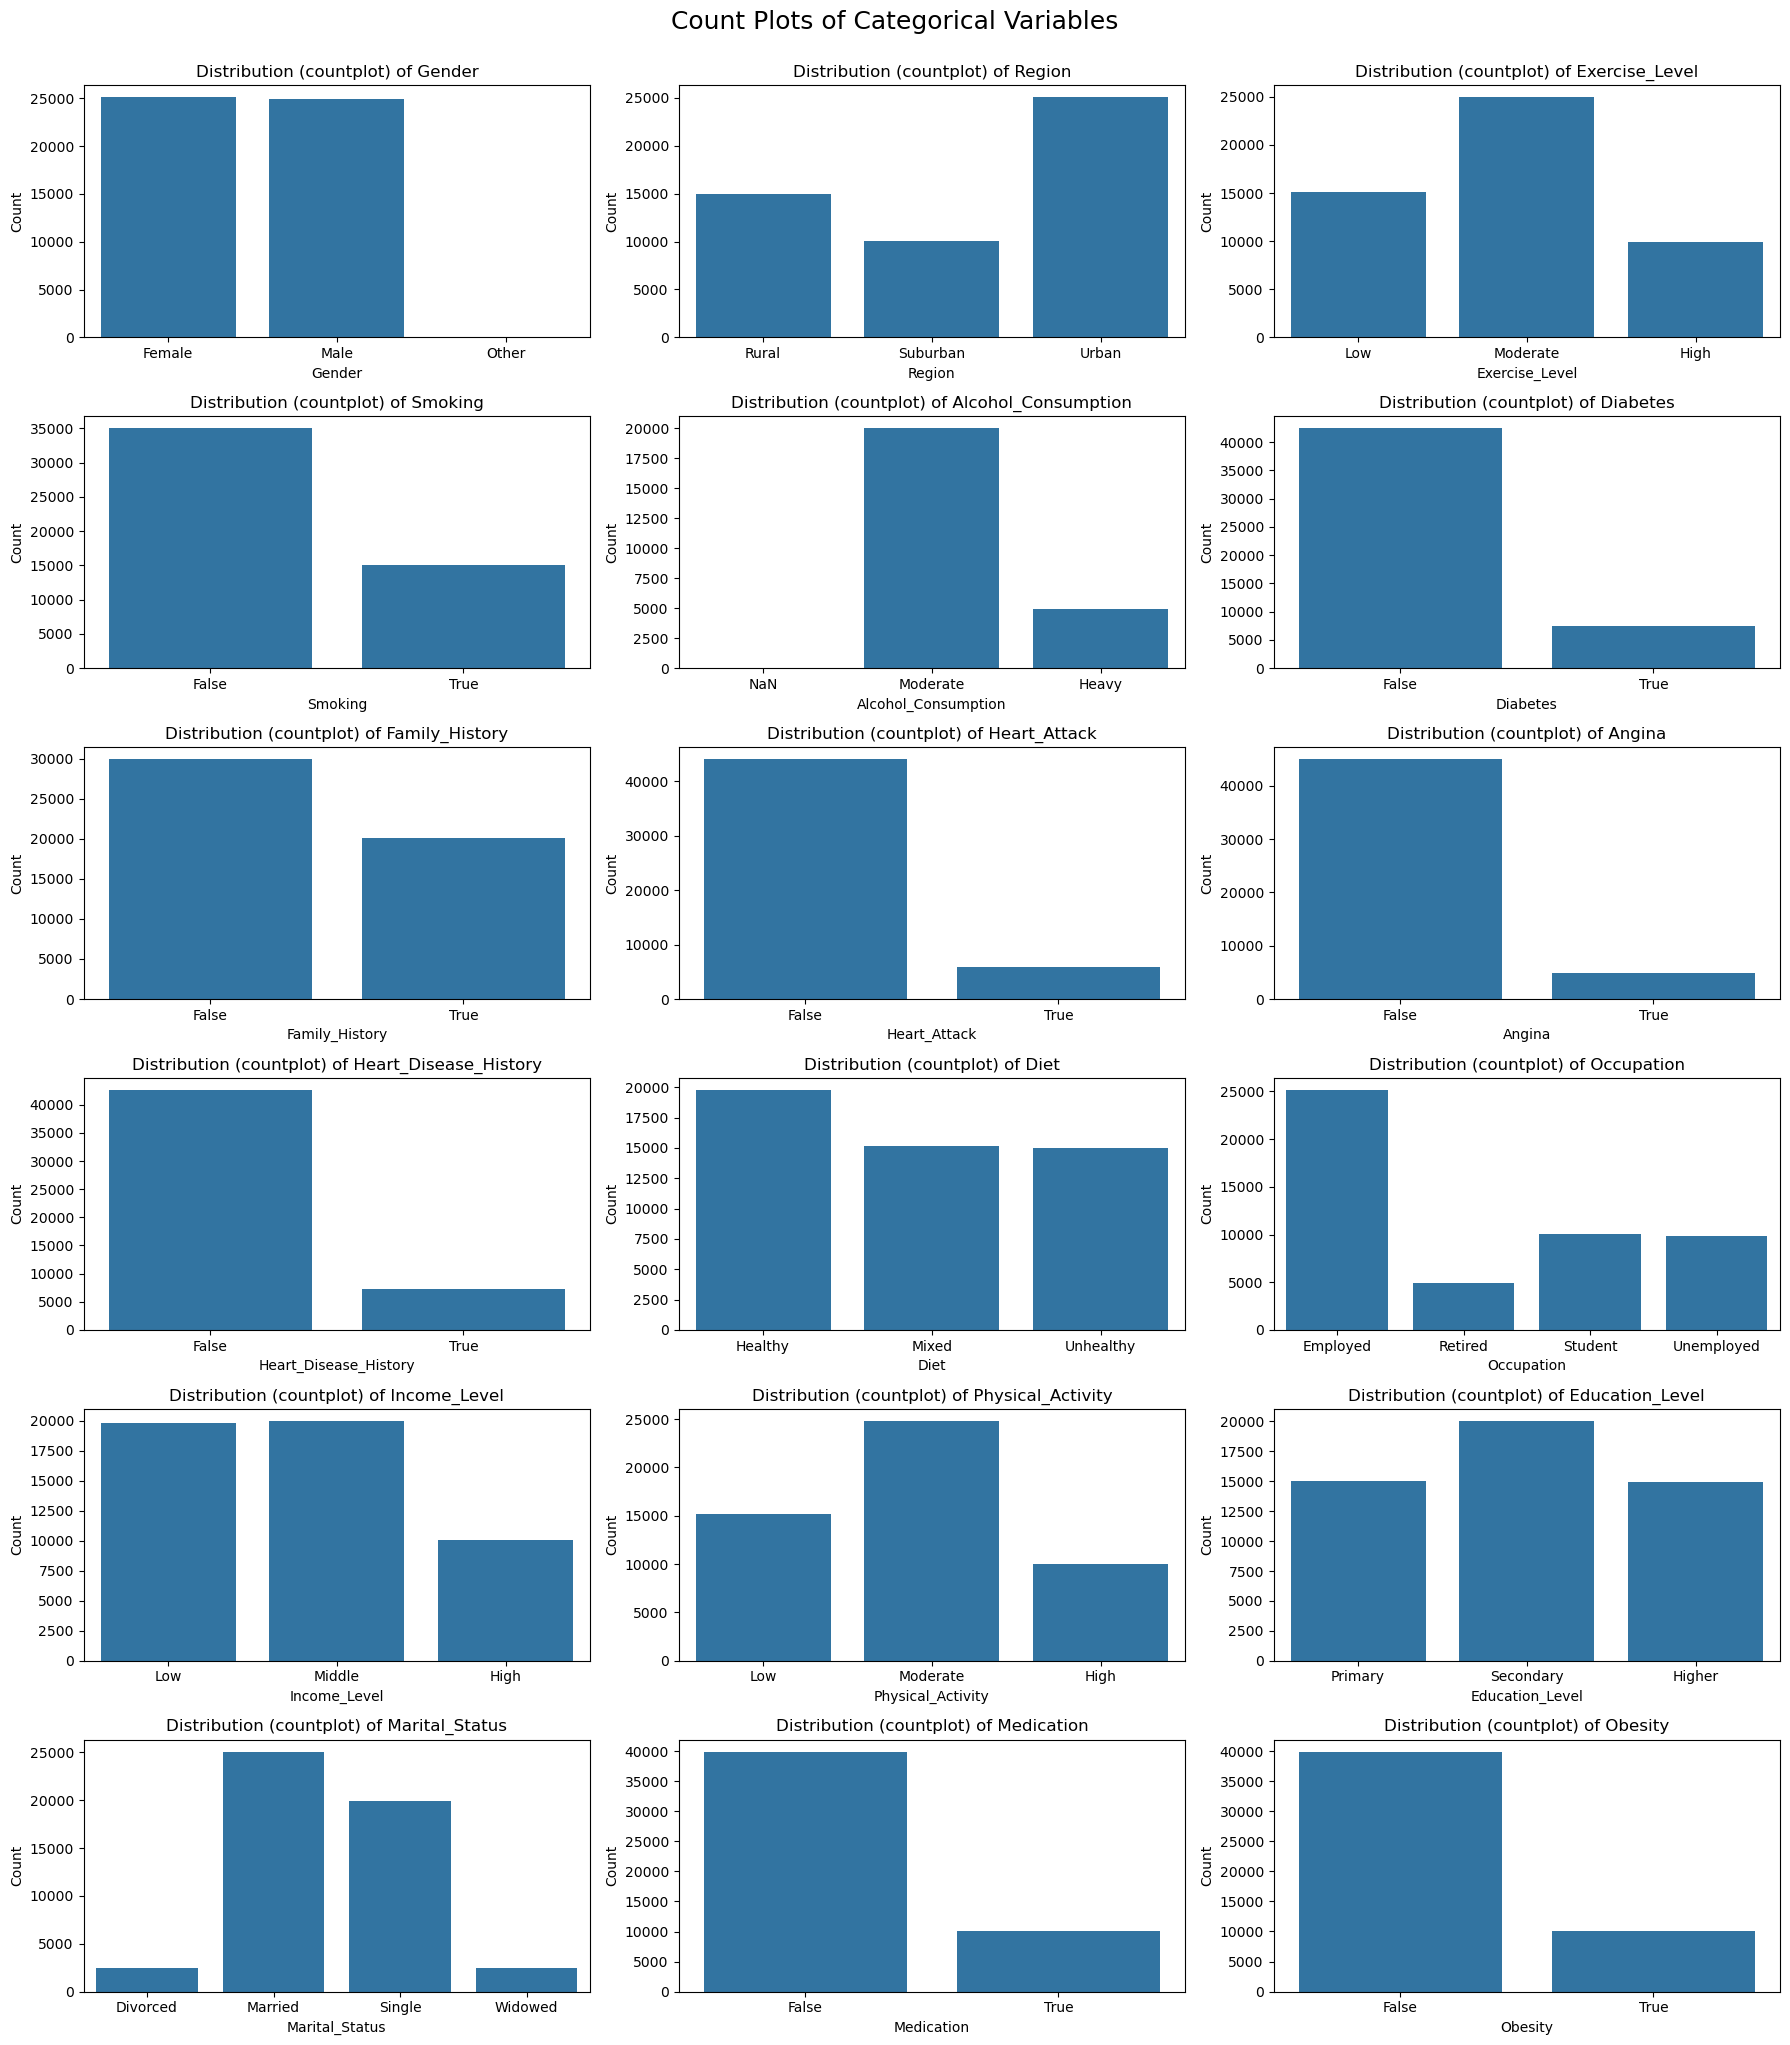

In [67]:
#Plot countplot for each categorical variable
#Categorical_variables

#Set up the plot grid.
plt.figure(figsize=(18,20))

#Plot countplot for each categorical variable

for i, var in enumerate(Cat_variables, 1):
    plt.subplot((len(Cat_variables)+2)//3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution (countplot) of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Count Plots of Categorical Variables', fontsize=18, y=1.02)
plt.show()

### BIVARIATE ANALYSIS.

#### Numerical vs Numerical:

<Axes: xlabel='Age', ylabel='Blood_Pressure'>

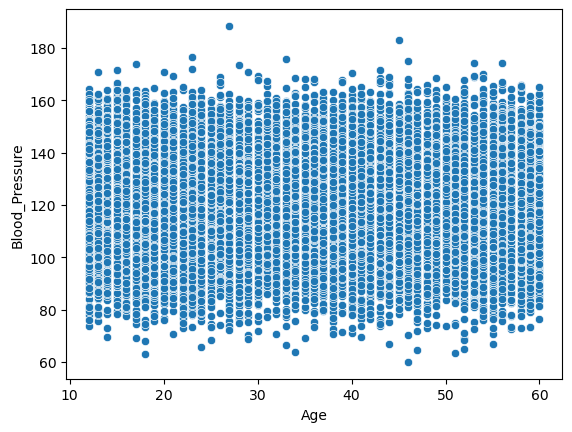

In [69]:
# Age vs Blood_Pressure

sns.scatterplot(x='Age', y='Blood_Pressure', data=df)

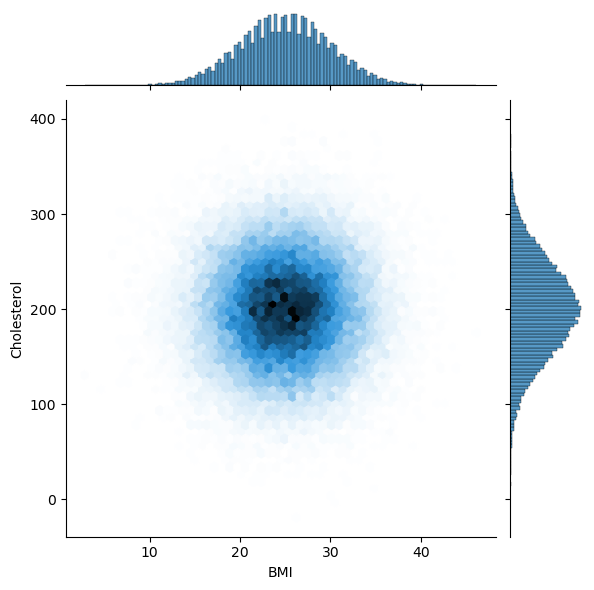

In [78]:
# BMI vs Cholesterol
sns.jointplot(x='BMI', y='Cholesterol', data=df, kind='hex')

#### Categorical vs Numerical

<Axes: xlabel='Smoking', ylabel='Heart_Rate'>

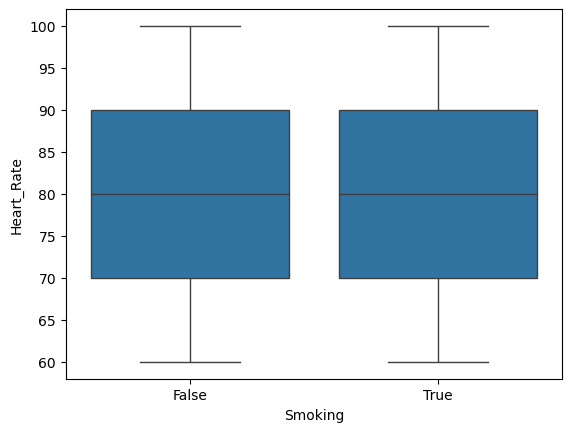

In [79]:
#smoking vs Heart

sns.boxplot(x='Smoking', y='Heart_Rate', data=df)

Text(0.5, 1.0, 'Swarm plot of gander and BMI')

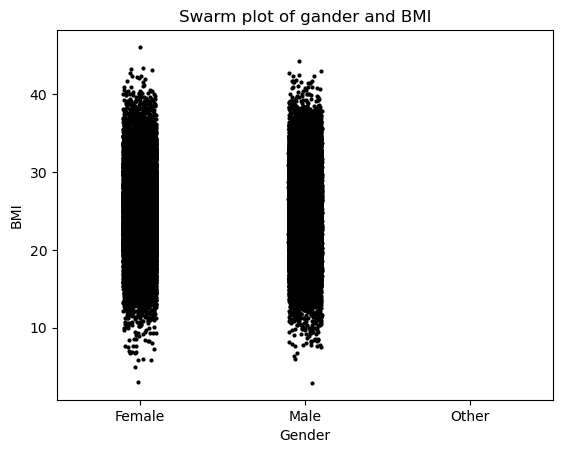

In [89]:
# Gender vs BMI

sns.stripplot(x='Gender', y='BMI', data=df, color='k', size=3,)
plt.title('Swarm plot of gander and BMI')

#### Categorical vs Categorical

<Axes: xlabel='Smoking'>

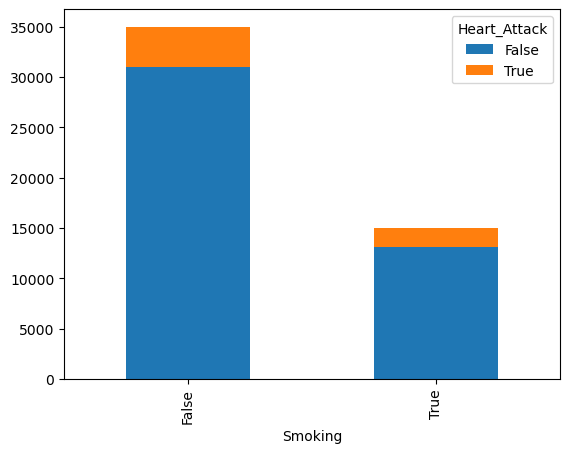

In [81]:
#Smoking vs Heart_Attack

pd.crosstab(df['Smoking'], df['Heart_Attack']).plot(kind='bar', stacked=True)

<Axes: xlabel='Diabetes'>

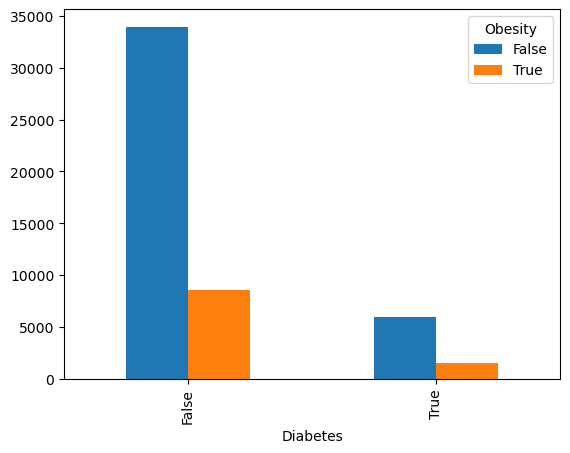

In [83]:
#Diabetes vs Obesity

pd.crosstab(df['Diabetes'], df['Obesity']).plot(kind='bar')

### Multivariate Analysis

#### Numerical vs Numerical

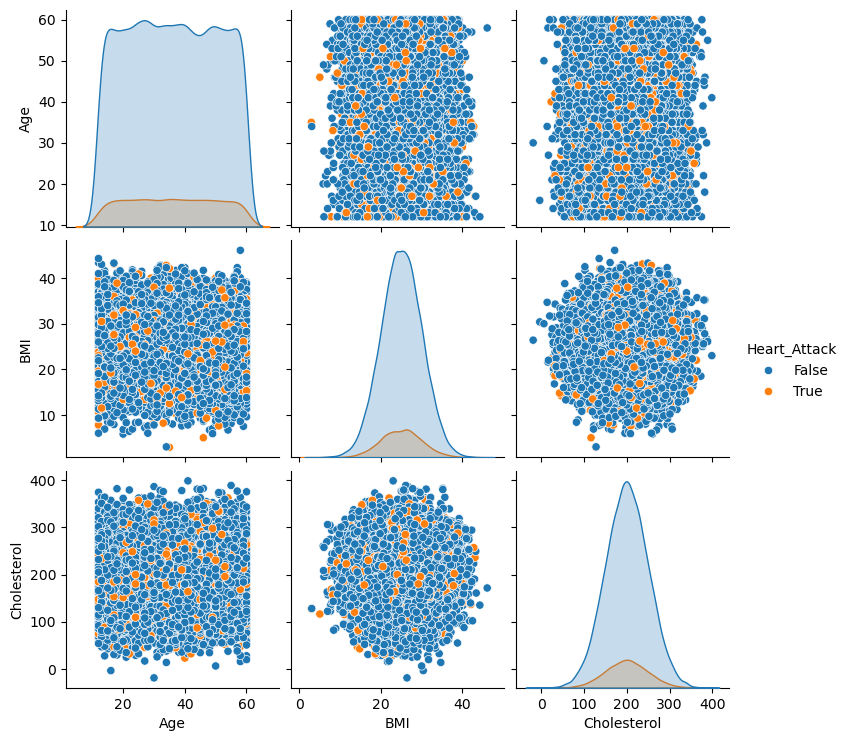

In [6]:
sns.pairplot(df[['Age', 'BMI', 'Cholesterol', 'Heart_Attack']], hue='Heart_Attack')
plt.savefig('pairplot2.png', bbox_inches='tight')

<Axes: xlabel='Exercise_Level'>

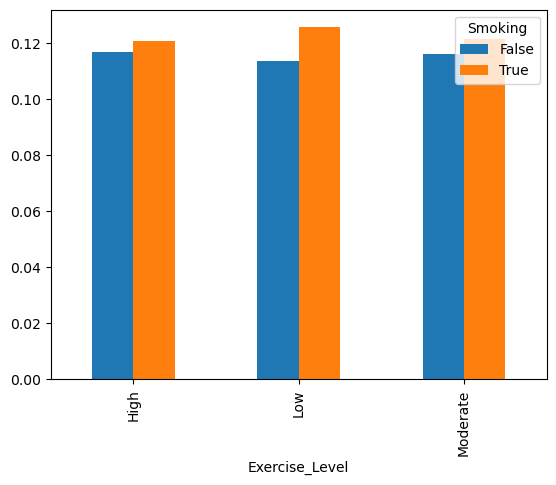

In [7]:
df.groupby(['Exercise_Level', 'Smoking'])['Heart_Attack'].mean().unstack().plot(kind='bar')

### Target variable Analysis

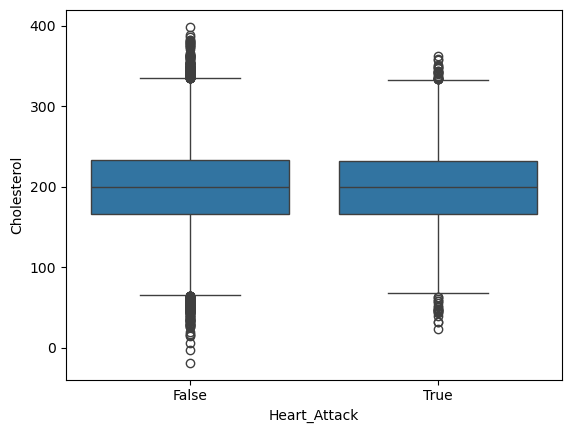

In [10]:
# Explore Associations

sns.boxplot(x='Heart_Attack', y='Cholesterol', data=df)
plt.savefig('heartAttack_Chol.png', bbox_inches='tight')

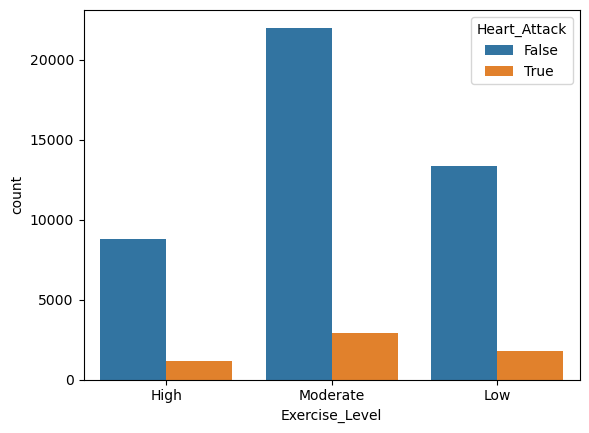

In [11]:
sns.countplot(x='Exercise_Level', hue='Heart_Attack', data=df)
plt.savefig('heartAttack_Exerc.png', bbox_inches='tight')

### Correlation

In [13]:
corr = df.corr(numeric_only=True)
corr

,ID,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Smoking,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Sleep_Hours,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
ID,1.000000,-0.000960,-0.002179,-0.001557,-0.004983,-0.002763,0.004222,0.008245,-0.000192,-0.001831,-0.010313,0.001556,0.000876,0.001487,-0.003878,0.002723,0.001225,0.006512,-0.001466
Age,-0.000960,1.000000,-0.000037,-0.004874,0.002640,-0.003697,-0.001180,0.004984,0.002473,0.009260,0.000841,0.003647,0.004696,-0.009355,-0.004225,0.006636,0.001802,-0.000388,0.004632
Blood_Pressure,-0.002179,-0.000037,1.000000,0.001381,-0.004789,-0.012488,-0.002458,0.004579,-0.002315,-0.000293,-0.010560,0.009775,0.006524,-0.001150,-0.006725,-0.003992,-0.001918,0.003967,0.006876
Cholesterol,-0.001557,-0.004874,0.001381,1.000000,0.007048,0.002148,-0.000306,0.002173,-0.004981,0.003586,-0.003397,-0.000826,-0.000244,-0.008863,0.006661,0.001364,-0.000053,0.000933,0.004517
BMI,-0.004983,0.002640,-0.004789,0.007048,1.000000,-0.009491,0.005467,-0.004836,-0.002309,0.003273,-0.000526,0.000228,0.001396,0.003105,-0.007269,-0.003134,-0.001232,0.000980,-0.009421
Heart_Rate,-0.002763,-0.003697,-0.012488,0.002148,-0.009491,1.000000,-0.011459,0.000611,-0.003906,-0.003364,-0.002241,0.003273,0.010129,0.007489,-0.008292,-0.001228,-0.000040,-0.001706,0.004157
Smoking,0.004222,-0.001180,-0.002458,-0.000306,0.005467,-0.011459,1.000000,0.002883,0.008568,-0.003033,0.010113,0.006129,0.001747,0.002280,0.000927,0.004412,-0.004509,0.003781,-0.001294
Diabetes,0.008245,0.004984,0.004579,0.002173,-0.004836,0.000611,0.002883,1.000000,0.001506,0.001174,-0.004789,0.000357,0.004384,-0.004416,0.002102,0.003281,-0.003994,-0.001064,0.001094
Family_History,-0.000192,0.002473,-0.002315,-0.004981,-0.002309,-0.003906,0.008568,0.001506,1.000000,-0.001922,0.000322,0.001452,0.000366,0.007807,0.002970,-0.003600,-0.007358,-0.008587,0.001010
Stress_Level,-0.001831,0.009260,-0.000293,0.003586,0.003273,-0.003364,-0.003033,0.001174,-0.001922,1.000000,-0.005845,0.002903,0.004305,-0.003462,0.001189,0.002120,-0.005964,-0.005335,-0.006094


<Axes: >

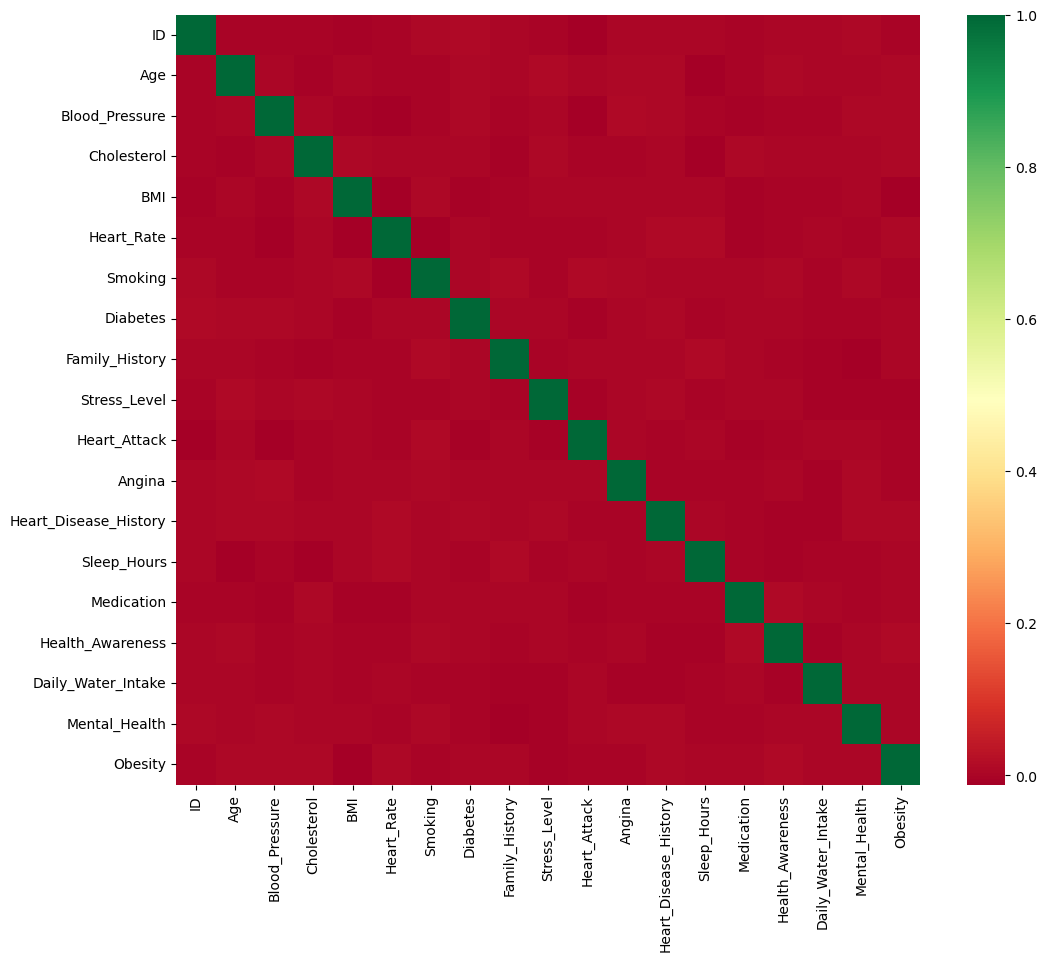

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='RdYlGn')

## SUMMARY AND INSIGHTS

- 50% of the individuals in the dataset have no report about their alcohol consumption status.
- Age Distribution: The density plot for Age shows a relatively uniform distribution from around 15 to 65 years.
- Most people fall within a normal to overweight range, with the median close to the overweight boundary.
- Obesity might be a concern in this population due to the long tail of high BMI outliers.
- There’s also a small group with very low BMI, which might indicate undernourishment or other health concerns.
- The normality of the distribution suggests a healthy population sample or good blood pressure control in a clinical sample.
- People with low and moderate level of exercise are more susceptible to heart attack than those with high level of exercise.
- Heart Attack Distribution: There is a potential link between elevated cholesterol/BMI and heart attack incidence.
- Heart attacks appear more often in middle-aged and older adults.
- BMI: BMI has a normal-like distribution, peaking around 25.
- Heart attack cases are more frequent in the upper BMI range, hinting at a positive correlation between BMI and heart attack risk.
- Cholesterol: Cholesterol distribution is bell-shaped, centered around 200.
- Similar to BMI, heart attacks are more frequent in individuals with higher cholesterol levels.

#### There isn’t a clear linear correlation between:
    - Age and BMI
    - Age and Cholesterol
    - BMI and Cholesterol
- There is a weak pairwise linear relationships but potential nonlinear or interaction effects influencing heart attack risk.

### Conclusion
- While each variable alone shows limited separation between heart attack outcomes, combinations of high BMI and high cholesterol, especially in middle-aged or older individuals, seem to increase the risk of heart attack.